# House prices prediction

In [19]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential   
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import missingno as msno

Loading source training data:

In [20]:
house_prices_train = pd.read_csv('./data/train.csv')


Calculating percentage of missing values (NaN):

         Column:  Amount of NaN values:  Percent of NaN values:
0         PoolQC                   1453               99.520548
1    MiscFeature                   1406               96.301370
2          Alley                   1369               93.767123
3          Fence                   1179               80.753425
4    FireplaceQu                    690               47.260274
5    LotFrontage                    259               17.739726
6     GarageType                     81                5.547945
7    GarageYrBlt                     81                5.547945
8   GarageFinish                     81                5.547945
9     GarageQual                     81                5.547945
10    GarageCond                     81                5.547945
11  BsmtExposure                     38                2.602740
12  BsmtFinType2                     38                2.602740
13  BsmtFinType1                     37                2.534247
14      BsmtCond                     37 

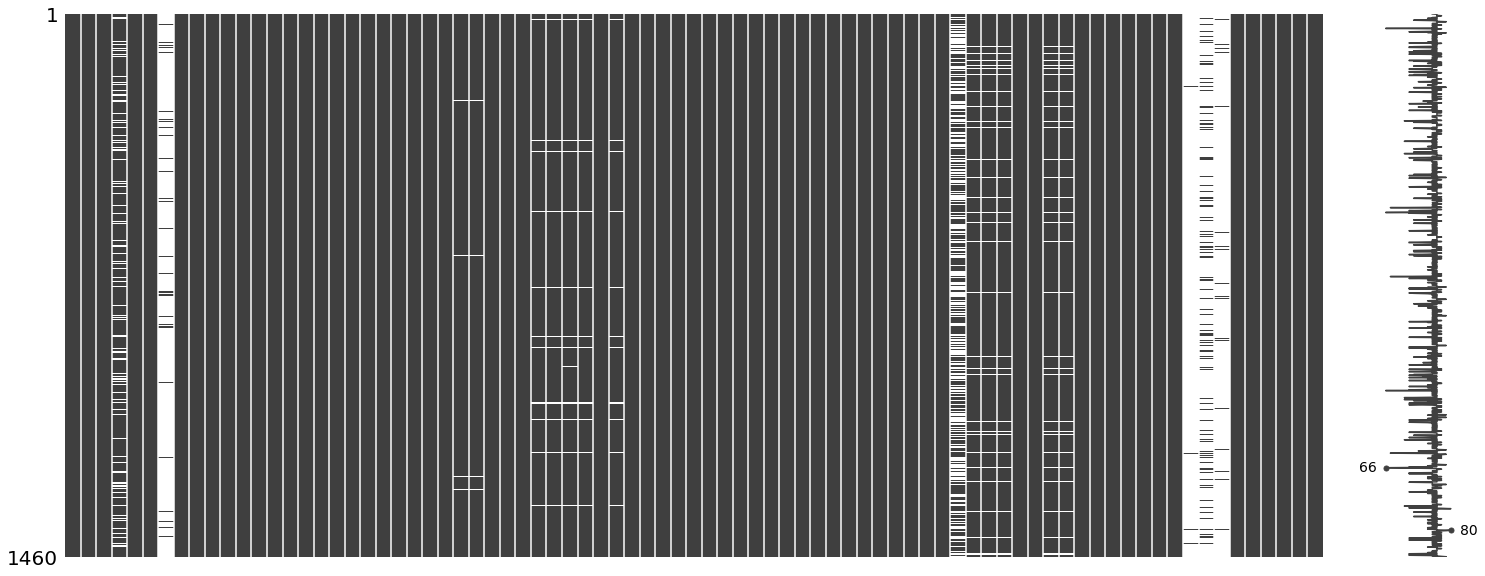

In [21]:
msno.matrix(house_prices_train)
nan_columns = pd.DataFrame({
    'Column:': house_prices_train.columns.values,
    'Amount of NaN values:': house_prices_train.isna().sum().values,
    'Percent of NaN values:': house_prices_train.isna().sum().values * 100 / len(house_prices_train), 
})
nan_columns = nan_columns[nan_columns['Amount of NaN values:'] > 0]
print(nan_columns.sort_values(by='Amount of NaN values:', ascending=False).reset_index(drop=True))


Deleting columns with 40%+ NaN values:

In [22]:
most_nan_columns = nan_columns[nan_columns['Percent of NaN values:'] > 40]
house_prices_train = house_prices_train.drop(list(most_nan_columns['Column:']), axis=1)


Replacing NaN values by values with column type:

<AxesSubplot:>

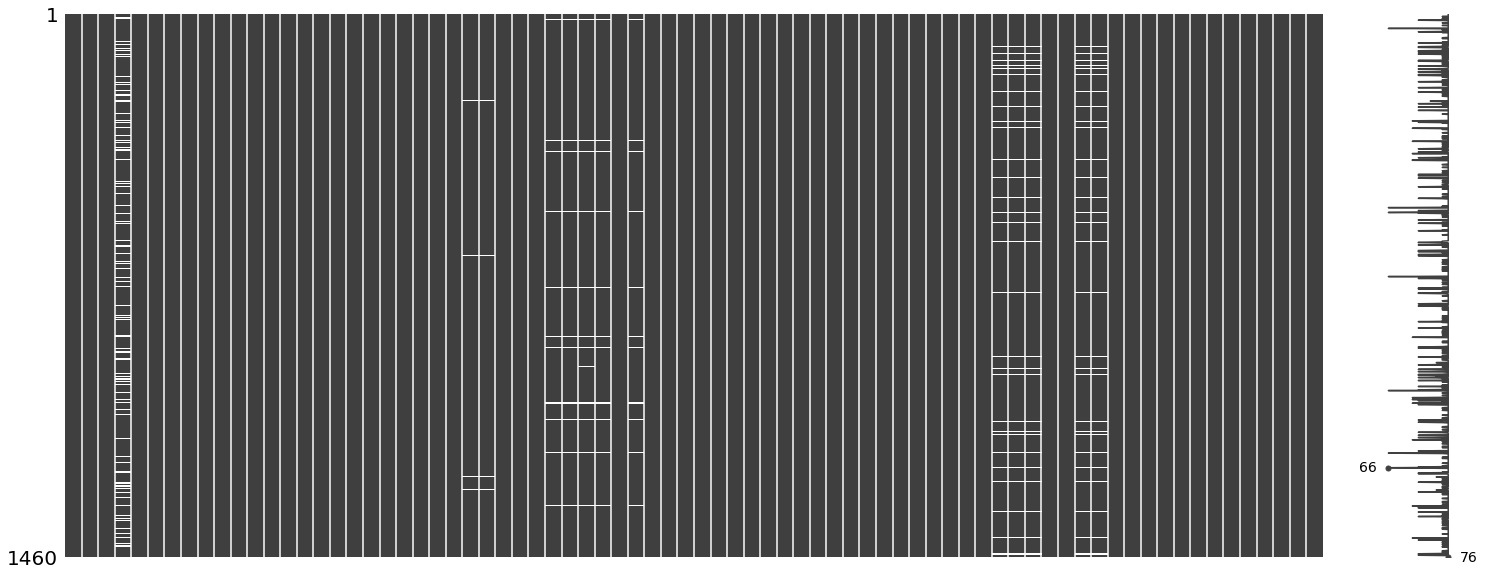

In [23]:
nan_columns = nan_columns[~(nan_columns['Column:'].isin(list(most_nan_columns['Column:'])))]
msno.matrix(house_prices_train)


Replace NaN values in columns (in numerical: by mean value, in categorial: by mode value):

<AxesSubplot:>

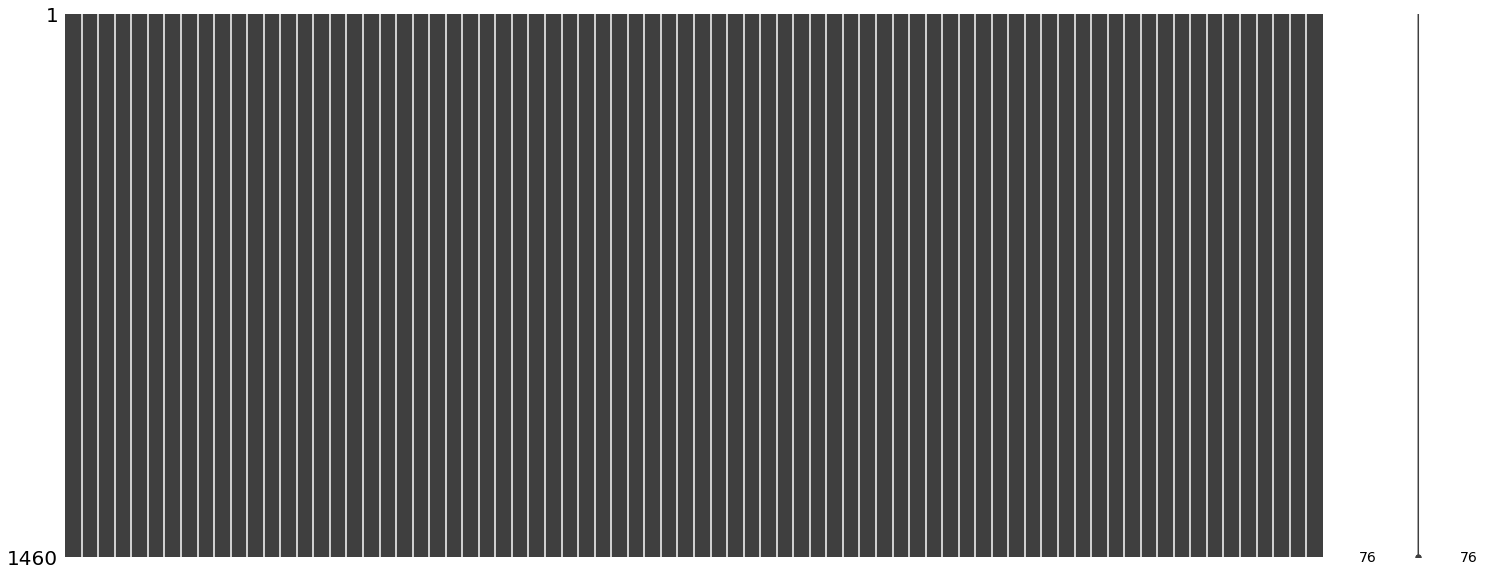

In [24]:
for column in nan_columns['Column:']:
    if house_prices_train[column].dtype == object:
        house_prices_train[column] = house_prices_train[column].fillna(house_prices_train[column].mode().to_numpy()[0])
    else:
        house_prices_train[column] = house_prices_train[column].fillna(house_prices_train[column].mean())

msno.matrix(house_prices_train)


Converting categorical values into numerical values:

In [25]:
for column in house_prices_train.columns:
    if house_prices_train[column].dtype == object:
        house_prices_train[column] = pd.factorize(house_prices_train[column].to_numpy())[0]


Separating training and testing data:

In [26]:
house_prices_input_test = house_prices_train.sample(frac=0.2, random_state=1)
house_prices_input_train = house_prices_train.drop(house_prices_input_test.index)

house_prices_output_train = house_prices_input_train.pop('SalePrice')
house_prices_output_test = house_prices_input_test.pop('SalePrice')


Data normalization:

In [27]:
for column in house_prices_input_train.columns:
    column_mean = house_prices_input_train[column].mean()
    column_std = house_prices_input_train[column].std()
    if abs(column_std - 0.0) <= 1e-5:
        column_std = 1
        
    house_prices_input_train[column] = house_prices_input_train[column] - column_mean
    house_prices_input_train[column] = house_prices_input_train[column] / column_std

    house_prices_input_test[column] = house_prices_input_test[column] - column_mean
    house_prices_input_test[column] = house_prices_input_test[column] / column_std


Creating model:

In [34]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(house_prices_input_train.shape[1],)))
model.add(Dense(256, activation='relu', input_shape=(house_prices_input_train.shape[1],)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])


Training the model:

In [35]:
model.fit(house_prices_input_train, house_prices_output_train, epochs=256, batch_size=1, verbose=1)


Epoch 1/256
1168/1168 [==============================] - 1s 561us/step - loss: 53.1721 - root_mean_squared_error: 192812.2736
Epoch 2/256
1168/1168 [==============================] - 1s 551us/step - loss: 11.1036 - root_mean_squared_error: 192889.0792
Epoch 3/256
1168/1168 [==============================] - 1s 558us/step - loss: 4.7276 - root_mean_squared_error: 175251.9249
Epoch 4/256
1168/1168 [==============================] - 1s 545us/step - loss: 2.0985 - root_mean_squared_error: 160650.9754
Epoch 5/256
1168/1168 [==============================] - 1s 552us/step - loss: 0.9349 - root_mean_squared_error: 133505.2645
Epoch 6/256
1168/1168 [==============================] - 1s 547us/step - loss: 0.3457 - root_mean_squared_error: 92712.2259
Epoch 7/256
1168/1168 [==============================] - 1s 552us/step - loss: 0.2768 - root_mean_squared_error: 69636.7428
Epoch 8/256
1168/1168 [==============================] - 1s 564us/step - loss: 0.1366 - root_mean_squared_error: 49805.7784
E

1168/1168 [==============================] - 1s 678us/step - loss: 0.0030 - root_mean_squared_error: 14069.7745
Epoch 67/256
1168/1168 [==============================] - 1s 660us/step - loss: 0.0040 - root_mean_squared_error: 16046.4296
Epoch 68/256
1168/1168 [==============================] - 1s 667us/step - loss: 0.0030 - root_mean_squared_error: 13860.1053
Epoch 69/256
1168/1168 [==============================] - 1s 775us/step - loss: 0.0029 - root_mean_squared_error: 14717.2061
Epoch 70/256
1168/1168 [==============================] - 1s 716us/step - loss: 0.0028 - root_mean_squared_error: 14369.3062
Epoch 71/256
1168/1168 [==============================] - 1s 679us/step - loss: 0.0028 - root_mean_squared_error: 15064.4200
Epoch 72/256
1168/1168 [==============================] - 1s 693us/step - loss: 0.0031 - root_mean_squared_error: 16030.6557
Epoch 73/256
1168/1168 [==============================] - 1s 639us/step - loss: 0.0024 - root_mean_squared_error: 13767.6595
Epoch 74/256


1168/1168 [==============================] - 1s 537us/step - loss: 0.0012 - root_mean_squared_error: 10091.3523
Epoch 131/256
1168/1168 [==============================] - 1s 542us/step - loss: 0.0012 - root_mean_squared_error: 9819.3269
Epoch 132/256
1168/1168 [==============================] - 1s 523us/step - loss: 0.0010 - root_mean_squared_error: 8563.3958
Epoch 133/256
1168/1168 [==============================] - 1s 522us/step - loss: 0.0012 - root_mean_squared_error: 9693.2309
Epoch 134/256
1168/1168 [==============================] - 1s 551us/step - loss: 9.2577e-04 - root_mean_squared_error: 8103.0412
Epoch 135/256
1168/1168 [==============================] - 1s 541us/step - loss: 0.0012 - root_mean_squared_error: 9909.2537
Epoch 136/256
1168/1168 [==============================] - 1s 537us/step - loss: 0.0013 - root_mean_squared_error: 9420.1703
Epoch 137/256
1168/1168 [==============================] - 1s 534us/step - loss: 0.0014 - root_mean_squared_error: 9449.7896
Epoch 138

1168/1168 [==============================] - 1s 527us/step - loss: 0.0011 - root_mean_squared_error: 6403.3674
Epoch 195/256
1168/1168 [==============================] - 1s 515us/step - loss: 5.1515e-04 - root_mean_squared_error: 5790.6679
Epoch 196/256
1168/1168 [==============================] - 1s 553us/step - loss: 6.7281e-04 - root_mean_squared_error: 5669.4818
Epoch 197/256
1168/1168 [==============================] - 1s 541us/step - loss: 5.0538e-04 - root_mean_squared_error: 4785.8784
Epoch 198/256
1168/1168 [==============================] - 1s 543us/step - loss: 7.6165e-04 - root_mean_squared_error: 5547.1864
Epoch 199/256
1168/1168 [==============================] - 1s 514us/step - loss: 4.9180e-04 - root_mean_squared_error: 5300.3592
Epoch 200/256
1168/1168 [==============================] - 1s 512us/step - loss: 5.7694e-04 - root_mean_squared_error: 4905.5329
Epoch 201/256
1168/1168 [==============================] - 1s 514us/step - loss: 6.0490e-04 - root_mean_squared_err

Analyzing accuracy:

,pred,expected
count,292.000000,292.000000
mean,176327.468750,175772.613014
std,76808.523438,84595.814158
min,47619.894531,40000.000000
25%,121861.078125,124000.000000
50%,159407.195312,158250.000000
75%,208455.507812,200625.000000
max,553575.062500,745000.000000


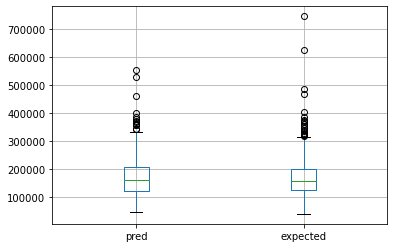

In [56]:
pred_dataframe = pd.DataFrame()
pred = model.predict(house_prices_input_test)
pred_dataframe['pred'] = pd.Series(pred.reshape(-1))
pred_dataframe['expected'] = house_prices_output_test.to_numpy()
pred_dataframe.boxplot(column=['pred', 'expected'])
pred_dataframe.describe()

# Prediction with test data:

Loading sourse test data:

In [66]:
house_prices_test = pd.read_csv('./data/test.csv')


Prepare output dataframe:

In [67]:
house_prices_predicted_dataframe = pd.DataFrame()
house_prices_predicted_dataframe['Id'] = house_prices_test['Id']


Calculating percentage of missing values (NaN):

         Column:  Amount of NaN values:  Percent of NaN values:
0         PoolQC                   1456               99.794380
1    MiscFeature                   1408               96.504455
2          Alley                   1352               92.666210
3          Fence                   1169               80.123372
4    FireplaceQu                    730               50.034270
5    LotFrontage                    227               15.558602
6     GarageCond                     78                5.346127
7    GarageYrBlt                     78                5.346127
8     GarageQual                     78                5.346127
9   GarageFinish                     78                5.346127
10    GarageType                     76                5.209047
11      BsmtCond                     45                3.084304
12  BsmtExposure                     44                3.015764
13      BsmtQual                     44                3.015764
14  BsmtFinType1                     42 

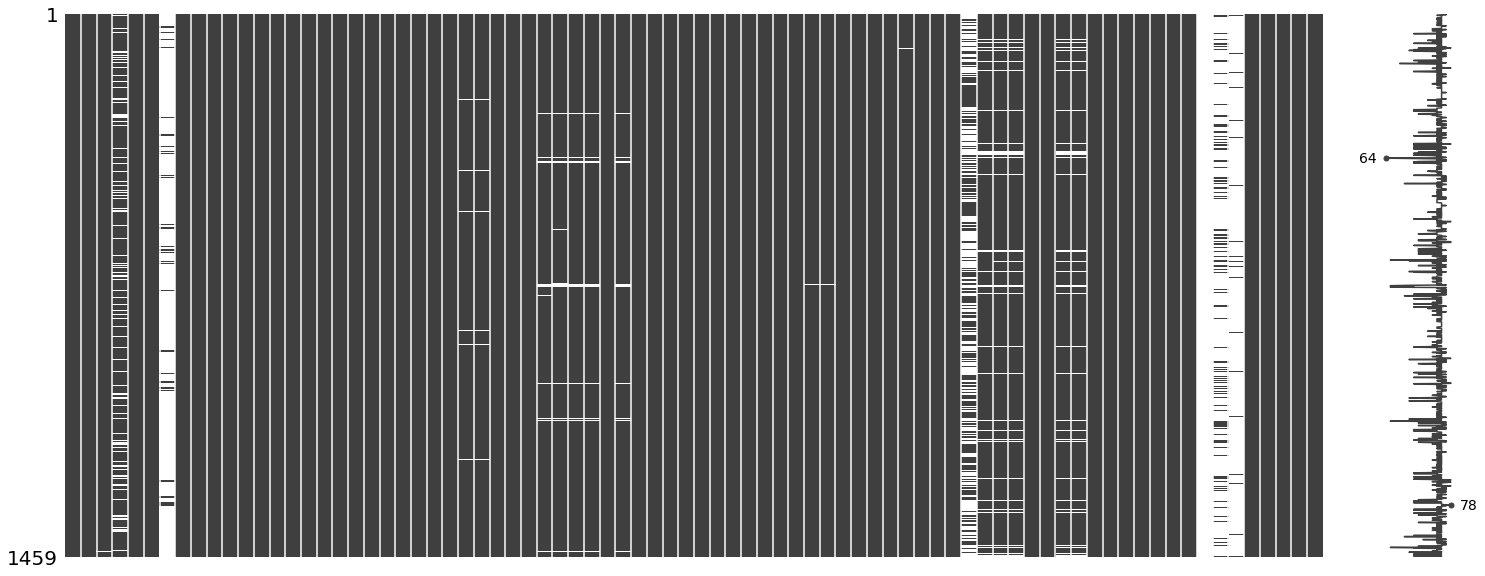

In [68]:
msno.matrix(house_prices_test)
nan_columns = pd.DataFrame({
    'Column:': house_prices_test.columns.values,
    'Amount of NaN values:': house_prices_test.isna().sum().values,
    'Percent of NaN values:': house_prices_test.isna().sum().values * 100 / len(house_prices_test), 
})
nan_columns = nan_columns[nan_columns['Amount of NaN values:'] > 0]
print(nan_columns.sort_values(by='Amount of NaN values:', ascending=False).reset_index(drop=True))


Deleting columns with 40%+ NaN values thad had been deleted before training:

<AxesSubplot:>

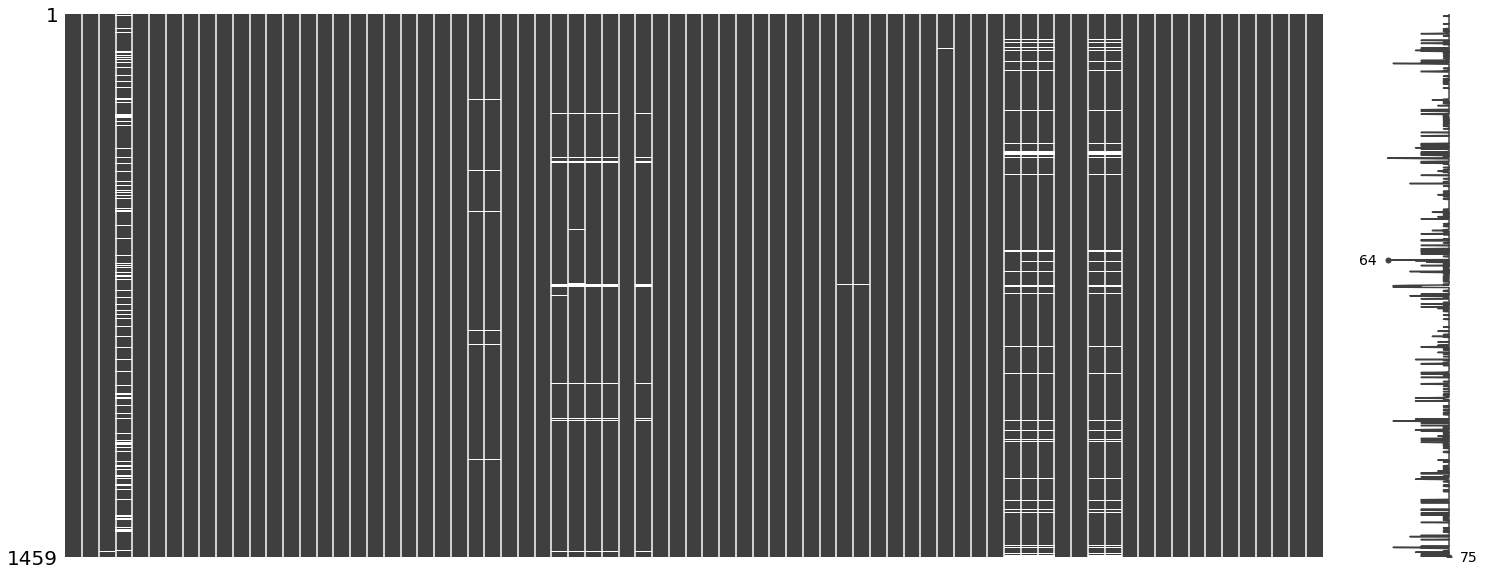

In [69]:
house_prices_test = house_prices_test.drop(list(most_nan_columns['Column:']), axis=1)
nan_columns = nan_columns[~(nan_columns['Column:'].isin(list(most_nan_columns['Column:'])))]
msno.matrix(house_prices_test)


Replace NaN values in columns (in numerical: by mean value, in categorial: by mode value):

<AxesSubplot:>

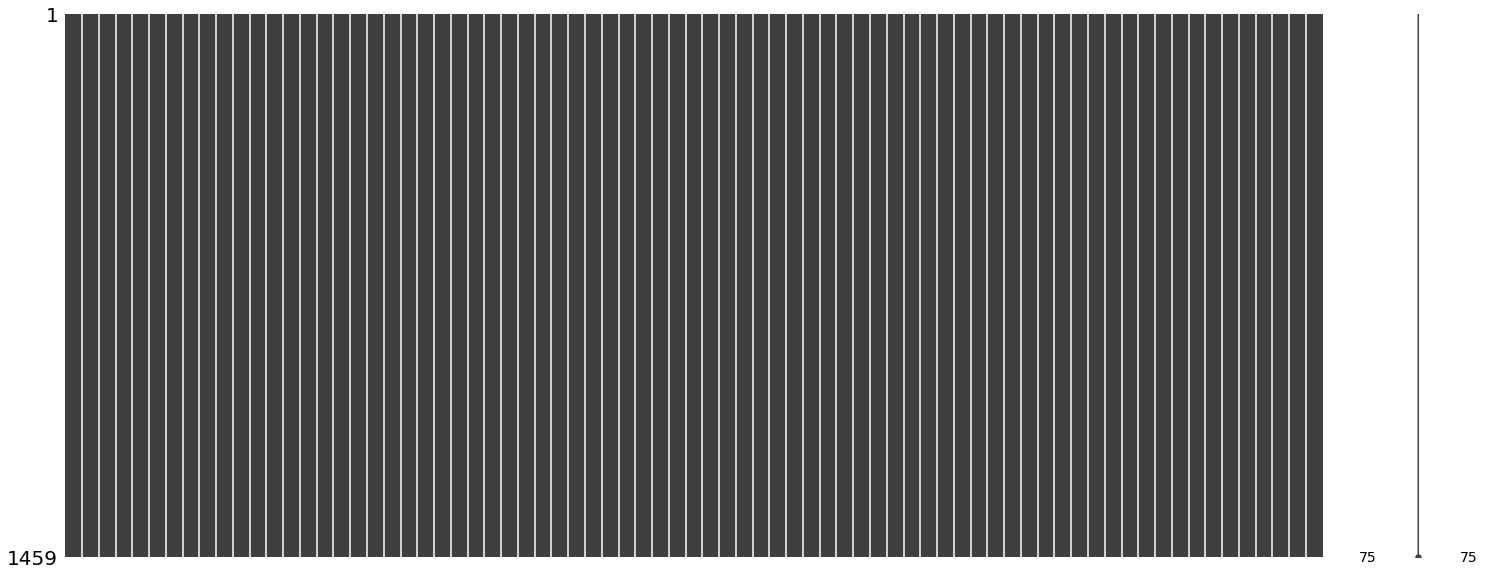

In [70]:
for column in nan_columns['Column:']:
    if house_prices_test[column].dtype == object:
        house_prices_test[column] = house_prices_test[column].fillna(house_prices_test[column].mode().to_numpy()[0])
    else:
        house_prices_test[column] = house_prices_test[column].fillna(house_prices_test[column].mean())

msno.matrix(house_prices_test)



Converting categorical values into numericalvalues:

In [71]:
for column in house_prices_test.columns:
    if house_prices_test[column].dtype == object:
        house_prices_test[column] = pd.factorize(house_prices_test[column].to_numpy())[0]


Data normalization:

In [72]:
for column in house_prices_test.columns:
    column_mean = house_prices_test[column].mean()
    column_std = house_prices_test[column].std()
    if abs(column_std - 0.0) <= 1e-5:
        column_std = 1
        
    house_prices_test[column] = house_prices_test[column] - column_mean
    house_prices_test[column] = house_prices_test[column] / column_std



Prediction:

In [73]:
house_prices_predicted = model.predict(house_prices_test)
house_prices_predicted = house_prices_predicted.reshape(-1)


Saving predicted values to csv:

In [74]:
house_prices_predicted_dataframe['SalePrice'] = pd.Series(house_prices_predicted)
house_prices_predicted_dataframe.to_csv('./output/predicted_prices.csv')
